In [5]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv


--2020-01-25 11:03:05--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

100%[======================================>] 34,276      --.-K/s   in 0.002s  

2020-01-25 11:03:05 (15.3 MB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



In [6]:
import pandas as pd

In [8]:
Data=pd.read_csv("Cust_Segmentation.csv")


In [9]:
Data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [10]:
#As you can see address is categorical variable so we will have to remove it
Data1 = Data.drop('Address', axis=1)
Data1.head()
a = Data1[['Age','Edu','Years Employed','Income','Card Debt','Other Debt','DebtIncomeRatio']] .values  #.astype(float)
a

array([[41.   ,  2.   ,  6.   , ...,  0.124,  1.073,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  4.582,  8.218, 12.8  ],
       [33.   ,  2.   , 10.   , ...,  6.111,  5.802, 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  2.802,  3.21 , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.116,  0.696,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  1.866,  3.638,  8.6  ]])

In [11]:
y = Data1['Defaulted'].values
y[0:10]

array([ 0.,  0.,  1.,  0.,  0., nan,  0.,  0., nan,  0.])

In [12]:
# As you ca see there are some Nans present in the defaulted column in the data set so we need to convert it to a numerical value 
import numpy as np
y = np.nan_to_num(y)
y[0:10]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
# Since we are using the different classification models so it is bettrer to normalizing the data set-
from sklearn.preprocessing import StandardScaler
a = np.nan_to_num(a)
x = StandardScaler().fit_transform(a)

In [14]:
Data1['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [20]:
#Train and Test Split-
#We will train our model on the 80% of the data and test it on the rest 20% 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (680, 7) (680,)
Test set: (170, 7) (170,)


In [21]:
# KNN-
from sklearn.neighbors import KNeighborsClassifier
# Lets take k=5
k=5
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train) 
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
yhat = knn.predict(x_test)
yhat[0:5]

array([0., 0., 0., 0., 1.])

In [23]:
#Accuracy evaluation
#jaccard_similarity_score function
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8352941176470589
Test set Accuracy:  0.8235294117647058


In [24]:
# We can calculate accuracy for different values of K
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
ConfustionMx = [];
for n in range(1,ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=knn.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.75294118, 0.81176471, 0.79411765, 0.81176471, 0.82352941,
       0.82941176, 0.82352941, 0.81764706, 0.81176471])

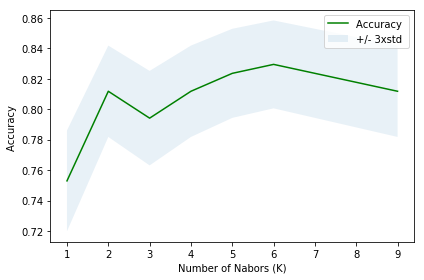

In [26]:
#Ploting model accuracy with different value of K
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [27]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)


The best accuracy was with 0.8294117647058824 with k= 6


In [28]:
#Decision Trees_
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
DT.fit(x_train,y_train)
DT

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
yhat_DT = DT.predict(x_test)
yhat_DT[0:5]

array([0., 0., 0., 0., 0.])

In [31]:
y_test[0:5]

array([0., 0., 0., 0., 0.])

In [32]:
#Accuracy Evaluation
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test,yhat_DT))

DecisionTrees's Accuracy:  0.788235294117647


In [22]:
# With maximum depth=4 the accuracy is 0.788235294118


In [23]:
#Logistic Regression-


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.1, solver='liblinear').fit(x_train,y_train)
LR
#liblinear is numerical optimizer to find the parameters.
#C parameter indicates inverse of regularization strength. Regularization is a technique used to solve the overfitting problem. Smaller values of C specify stronger regularization.

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
yhat_LR = LR.predict(x_test)
yhat_LR

array([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.83321874, 0.16678126],
       [0.93003959, 0.06996041],
       [0.84748739, 0.15251261],
       [0.8710534 , 0.1289466 ],
       [0.26789715, 0.73210285],
       [0.5623552 , 0.4376448 ],
       [0.94336225, 0.05663775],
       [0.43513056, 0.56486944],
       [0.60769859, 0.39230141],
       [0.87045965, 0.12954035],
       [0.86072107, 0.13927893],
       [0.80456315, 0.19543685],
       [0.70823453, 0.29176547],
       [0.77104449, 0.22895551],
       [0.5282737 , 0.4717263 ],
       [0.63073983, 0.36926017],
       [0.95135222, 0.04864778],
       [0.93350308, 0.06649692],
       [0.84136448, 0.15863552],
       [0.66123342, 0.33876658],
       [0.81429787, 0.18570213],
       [0.64761423, 0.35238577],
       [0.83837515, 0.16162485],
       [0.85672856, 0.14327144],
       [0.94337942, 0.05662058],
       [0.64754269, 0.35245731],
       [0.75548467, 0.24451533],
       [0.7442643 , 0.2557357 ],
       [0.71215515, 0.28784485],
       [0.60217124, 0.39782876],
       [0.

In [27]:
#The first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X)


In [39]:
#Jaccard Index
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat_LR)

0.8352941176470589

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat_LR, labels=[1,0]))


[[  9  19]
 [  9 133]]


Confusion matrix, without normalization
[[  9  19]
 [  9 133]]


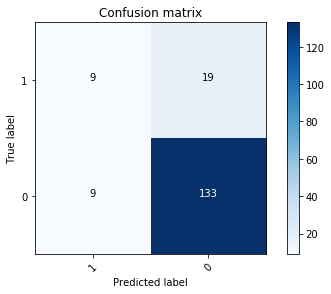

In [41]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_LR, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

In [42]:
# F1 Score
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat_LR))

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.90       142
         1.0       0.50      0.32      0.39        28

   micro avg       0.84      0.84      0.84       170
   macro avg       0.69      0.63      0.65       170
weighted avg       0.81      0.84      0.82       170



In [32]:
#Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)#
#Recall is true positive rate. It is defined as: Recall = TP / (TP + FN)
#F1 score is the harmonic average of the precision and recall.
#F1-score for both labels-> 0.79. But for label 1 f1 score is very less which is very much evident by the confusion matrix.

In [43]:
#Log Loss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.40467004499098275

In [44]:
#We will perform the same analysis again by using different numerical optimizer to see whether we get lower value of log loss or not. For example 'newton-cg'.
LR = LogisticRegression(C=0.1, solver='newton-cg').fit(x_train,y_train)
LR
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat_LR)
yhat_prob = LR.predict_proba(x_test)
yhat_LR = LR.predict(x_test)

In [45]:
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat_LR))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       142
         1.0       0.47      0.25      0.33        28

   micro avg       0.83      0.83      0.83       170
   macro avg       0.67      0.60      0.61       170
weighted avg       0.80      0.83      0.81       170



In [46]:
#Log Loss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.39291713877698137

In [37]:
# We get lower value of the log loss by using 'newton-cg' instead of 'liblinear'

In [38]:
#Support Vector Machine-

In [47]:
from sklearn import svm
#We are using linear kernal function
Svm = svm.SVC(kernel='linear')
Svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [48]:
yhat_svm = Svm.predict(x_test)
yhat_svm [0:5]

array([0., 0., 0., 0., 1.])

In [50]:
#Accuracy Evaluation
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       142
         1.0       0.36      0.18      0.24        28

   micro avg       0.81      0.81      0.81       170
   macro avg       0.60      0.56      0.57       170
weighted avg       0.77      0.81      0.78       170

Confusion matrix, without normalization
[[133   9]
 [ 23   5]]


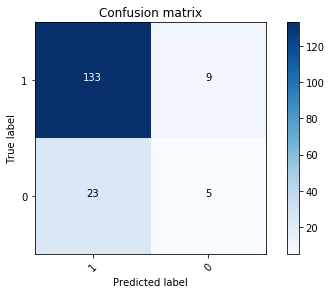

In [51]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_svm, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_svm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

In [52]:
#F1 Score->
f1_score(y_test, yhat_svm, average='weighted')

0.7848137912883273

In [53]:
#Jaccard Index->
jaccard_similarity_score(y_test, yhat_svm)

0.8117647058823529